# Práctica 4 - Regresión Polinomial
> Machine Learning and Artificial Intelligence - PhD Consuelo Varinia García Mendoza

> Daniel Armas Ramírez

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

In [46]:
df = pd.read_csv('./datos.csv')
X = df[['x']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, shuffle = True, train_size=0.7, test_size=0.3)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Regresión lineal con OLS

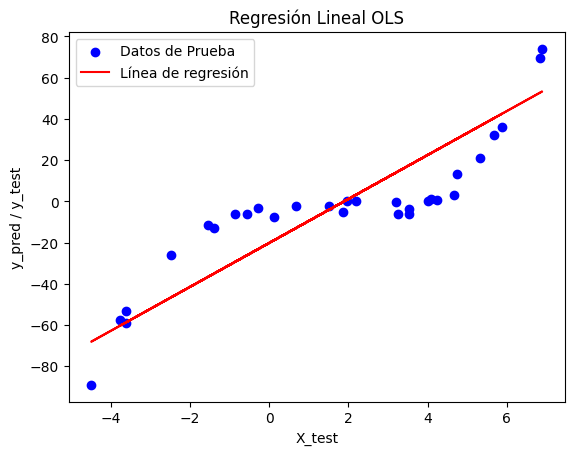

In [47]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


ols_data = ['Regresión Lineal con OLS', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de Prueba')
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Lineal OLS')
plt.legend()
plt.show()

In [48]:
ols_data

['Regresión Lineal con OLS', 296.0945867766399, 0.7198048208163852]

### Regresión polinomial grado 2 con OLS

In [49]:
poly_reg_model_2 = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
poly_reg_model_2.fit(X_train, y_train)

y_pred = poly_reg_model_2.predict(X_test)
ols_2_data = ['Regresión Polinomial de grado 2 con OLS', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

In [50]:
ols_2_data

['Regresión Polinomial de grado 2 con OLS',
 352.43738401011154,
 0.6664874659184126]

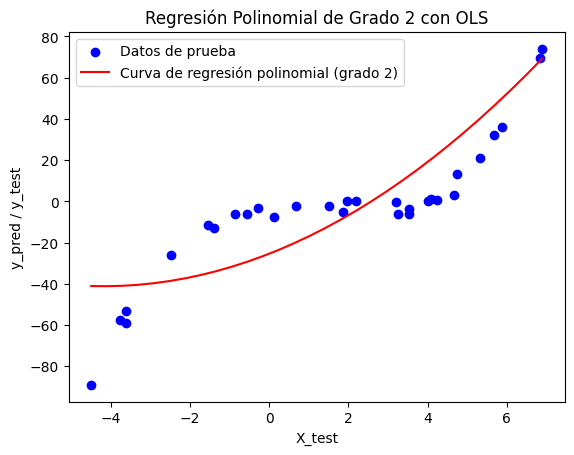

In [20]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train.reshape(-1, 1))

poly_reg_model_2 = LinearRegression()
poly_reg_model_2.fit(poly_features, y_train)

x_test = np.linspace(X_test.min(), X_test.max(), 30).reshape(-1, 1)

y_pred = poly_reg_model_2.predict(poly.transform(x_test))

ols_2_data = ['Regresión Polinomial de grado 2 con OLS', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(x_test, y_pred, color='red', label='Curva de regresión polinomial (grado 2)')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Polinomial de Grado 2 con OLS')
plt.legend()
plt.show()

### Regresión polinomial grado 3 con OLS

In [51]:
poly_reg_model_3 = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), LinearRegression())
poly_reg_model_3.fit(X_train, y_train)

y_pred = poly_reg_model_3.predict(X_test)
ols_3_data = ['Regresión Polinomial de grado 3 con OLS', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
ols_3_data

['Regresión Polinomial de grado 3 con OLS',
 8.487854131822663,
 0.9919679186464003]

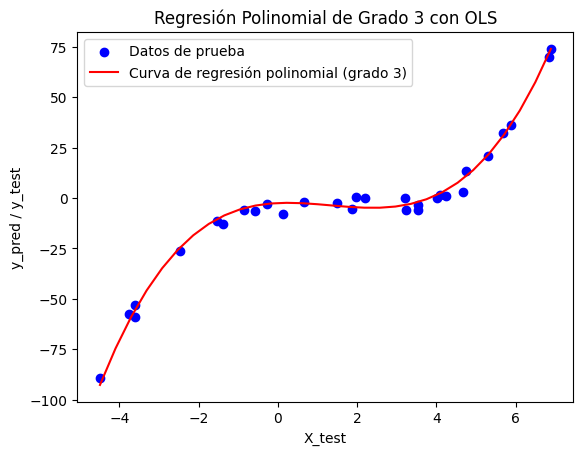

In [21]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X_train.reshape(-1, 1))

poly_reg_model_3 = LinearRegression()
poly_reg_model_3.fit(poly_features, y_train)

x_test = np.linspace(X_test.min(), X_test.max(), 30).reshape(-1, 1)

y_pred = poly_reg_model_3.predict(poly.transform(x_test))

ols_3_data = ['Regresión Polinomial de grado 3 con OLS', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(x_test, y_pred, color='red', label='Curva de regresión polinomial (grado 3)')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Polinomial de Grado 3 con OLS')
plt.legend()
plt.show()

### Regresión Lineal con SGD 

/home/darmasrmz/5AM1/ml/optimization/env/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


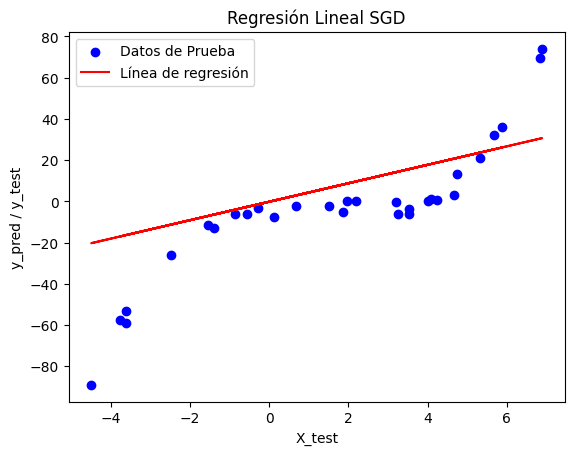

In [52]:
sgdr = SGDRegressor(learning_rate='constant', eta0=0.0000001, max_iter = 10000)
sgdr.fit(X_train, y_train)

y_pred = sgdr.predict(X_test)

sgd_data = ['Regresión Lineal con SGD', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de Prueba')
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Lineal SGD')
plt.legend()
plt.show()

In [53]:
sgd_data

['Regresión Lineal con SGD', 554.9639646710341, 0.4748359663908671]

### Regresión polinomial grado 2 con SGD

In [54]:
poly_sgd_model_2 = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), SGDRegressor(learning_rate='constant', eta0=0.0000001, max_iter = 10000))
poly_sgd_model_2.fit(X_train, y_train)

y_pred = poly_sgd_model_2.predict(X_test)
sgd_2_data = ['Regresión Polinomial de grado 2 con SGD', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
sgd_2_data

/home/darmasrmz/5AM1/ml/optimization/env/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


['Regresión Polinomial de grado 2 con SGD',
 892.1428352348281,
 0.15576260850533652]

/home/darmasrmz/5AM1/ml/optimization/env/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


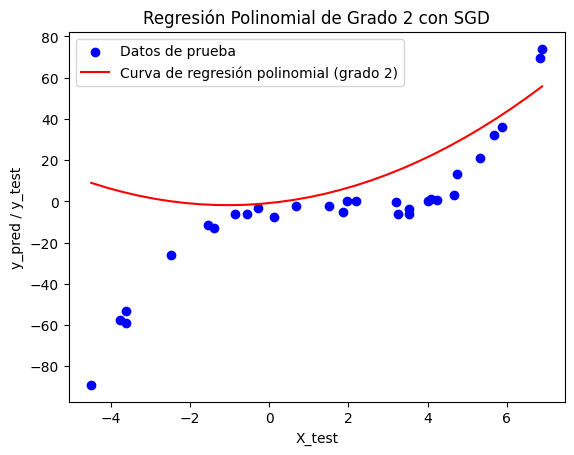

In [23]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train.reshape(-1, 1))

poly_sgd_model_2 = SGDRegressor(learning_rate='constant', eta0=0.0000001, max_iter = 10000)
poly_sgd_model_2.fit(poly_features, y_train)

x_test = np.linspace(X_test.min(), X_test.max(), 30).reshape(-1, 1)

y_pred = poly_sgd_model_2.predict(poly.transform(x_test))

sgd_2_data = ['Regresión Polinomial de grado 2 con SGD', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(x_test, y_pred, color='red', label='Curva de regresión polinomial (grado 2)')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Polinomial de Grado 2 con SGD')
plt.legend()
plt.show()

### Regresión polinomial grado 3 con SGD

In [55]:
poly_sgd_model_3 = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), SGDRegressor(learning_rate='constant', eta0=0.0000001, max_iter = 10000))
poly_sgd_model_3.fit(X_train, y_train)

y_pred = poly_sgd_model_3.predict(X_test)
sgd_3_data = ['Regresión Polinomial de grado 3 con SGD', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
sgd_3_data

['Regresión Polinomial de grado 3 con SGD',
 16.074106852029693,
 0.9847890253629711]

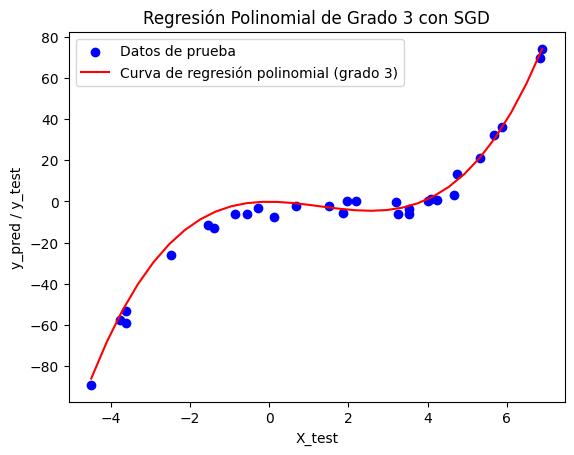

In [24]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X_train.reshape(-1, 1))

poly_sgd_model_3 = SGDRegressor(learning_rate='constant', eta0=0.0000001, max_iter = 10000)
poly_sgd_model_3.fit(poly_features, y_train)

x_test = np.linspace(X_test.min(), X_test.max(), 30).reshape(-1, 1)

y_pred = poly_sgd_model_3.predict(poly.transform(x_test))

sgd_3_data = ['Regresión Polinomial de grado 3 con SGD', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(x_test, y_pred, color='red', label='Curva de regresión polinomial (grado 3)')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Polinomial de Grado 3 con SGD')
plt.legend()
plt.show()

### Resultados

In [56]:
data = [ols_data, ols_2_data, ols_3_data, sgd_data, sgd_2_data, sgd_3_data]
results = pd.DataFrame(data, columns = ['Model', 'MSE', 'R^2'])
results

,Model,MSE,R^2
0,Regresión Lineal con OLS,296.094587,0.719805
1,Regresión Polinomial de grado 2 con OLS,352.437384,0.666487
2,Regresión Polinomial de grado 3 con OLS,8.487854,0.991968
3,Regresión Lineal con SGD,554.963965,0.474836
4,Regresión Polinomial de grado 2 con SGD,892.142835,0.155763
5,Regresión Polinomial de grado 3 con SGD,16.074107,0.984789


## Parte 2

In [2]:
df_2 = pd.read_csv('./cal_housing.csv')
X = df_2[['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome']].values
y = df_2['medianHouseValue'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, shuffle = True, train_size=0.8, test_size=0.2)

In [3]:
def fit_and_transform(x:np.array, degree:int, type:object):
    x_scaled = x.copy()
    if degree > 1:
        poly = PolynomialFeatures(degree=degree)
        x_scaled = poly.fit_transform(x_scaled)
        if type:
            x_scaled = type.fit_transform(x_scaled)
    else:
        x_scaled = type.fit_transform(x_scaled)
    return x_scaled

### Regresión Lineal

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
lireg = ['Regresión Lineal', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
lireg

['Regresión Lineal', 4853781771.947973, 0.6277645980446445]

### Regresión Polinomial Grado 2

In [5]:
model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
lreg_2_data = ['Regresión Polinomial de grado 2', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
lreg_2_data

['Regresión Polinomial de grado 2', 4076152929.289472, 0.6874007742097907]

### Regresión Polinomial Grado 2 con escalamiento estándar

In [6]:
standard = StandardScaler()
x_train_std = fit_and_transform(X_train, 2, standard)
x_test_std = fit_and_transform(X_test, 2, standard)

model = LinearRegression()
model.fit(x_train_std, y_train)
y_pred = model.predict(x_test_std)

lreg_2_std_data = ['Grado 2 con escalamiento estándar', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
lreg_2_std_data

['Grado 2 con escalamiento estándar', 4111950340.7116613, 0.6846554790037493]

### Regresión Polinomial Grado 2 con escalamiento robusto

In [7]:
robust = RobustScaler()
x_train_rbs = fit_and_transform(X_train, 2, robust)
x_test_rbs = fit_and_transform(X_test, 2, robust)

model = LinearRegression()
model.fit(x_train_rbs, y_train)
y_pred = model.predict(x_test_rbs)


lreg_2_rbs_data = ['Grado 2 con escalamiento robusto', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
lreg_2_rbs_data

['Grado 2 con escalamiento robusto', 5047513814.436979, 0.6129073324946555]

### OLS Grado 3

In [8]:
x_train = fit_and_transform(X_train, 3, None)
x_test = fit_and_transform(X_test, 3, None)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


lreg_3_data = ['Regresión Polinomial de grado 3', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
lreg_3_data

['Regresión Polinomial de grado 3', 4131193919.5275493, 0.6831796933932404]

### Regresión Polinomial Grado 3 con escalamiento estándar

In [9]:
standard = StandardScaler()
x_train_std = fit_and_transform(X_train, 3, standard)
x_test_std = fit_and_transform(X_test, 3, standard)

model = LinearRegression()
model.fit(x_train_std, y_train)
y_pred = model.predict(x_test_std)


lreg_3_std_data = ['Grado 3 con escalamiento estándar', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
lreg_3_std_data

['Grado 3 con escalamiento estándar', 8862039818.106274, 0.32037221514529335]

In [10]:
robust = RobustScaler()
x_train_rbs = fit_and_transform(X_train, 3, robust)
x_test_rbs = fit_and_transform(X_test, 3, robust)

model = LinearRegression()
model.fit(x_train_rbs, y_train)
y_pred = model.predict(x_test_rbs)


lreg_3_rbs_data = ['Grado 3 con escalamiento robusto', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
lreg_3_rbs_data

['Grado 3 con escalamiento robusto', 8684145318843.362, -664.9850968332794]

### Resultados

In [11]:
data = [lireg, lreg_2_data, lreg_2_std_data, lreg_2_rbs_data, lreg_3_data, lreg_3_std_data, lreg_3_rbs_data]
results = pd.DataFrame(data, columns = ['Model', 'MSE', 'R^2'])
results

,Model,MSE,R^2
0,Regresión Lineal,4.853782e+09,0.627765
1,Regresión Polinomial de grado 2,4.076153e+09,0.687401
2,Grado 2 con escalamiento estándar,4.111950e+09,0.684655
3,Grado 2 con escalamiento robusto,5.047514e+09,0.612907
4,Regresión Polinomial de grado 3,4.131194e+09,0.683180
5,Grado 3 con escalamiento estándar,8.862040e+09,0.320372
6,Grado 3 con escalamiento robusto,8.684145e+12,-664.985097
